### Component 2
#### 04/22/2017
----
#### Read in the Grant data

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('DiscGrants96to13.csv', encoding='latin')

In [4]:
data.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [5]:
data.keys()

Index(['LogNumber', 'Institution', 'Program', 'ProgramType', 'ProjectTitle',
       'ProjectType', 'AwardDate', 'InstAddr1', 'InstAddr2', 'InstAddr3',
       'InstCity', 'InstState', 'InstZip', 'AwardOrig', 'AwardTotal',
       'AppMatchAmount', 'ReqAwardAmount', 'ReqMatchAmount', 'Prefix',
       'FirstName', 'LastName', 'OrgType', 'FiscalYear', 'AwardPeriodFr',
       'AwardPeriodTo', 'OrgUnit', 'OUAddr1', 'OUAddr2', 'OUAddr3', 'OUCity',
       'OUState', 'OUZip', 'Latitude', 'Longitude', 'FIPSState', 'FIPSCounty',
       'CensusTract', 'CensusBlock', 'FIPSMCDCode', 'FIPSPlaceCode',
       'CBSACode', 'MetroDivisionCode', 'Description'],
      dtype='object')

In [162]:
data.AwardTotal

0          3390.0
1          6030.0
2          6030.0
4          6030.0
5          6030.0
6          6030.0
7          6350.0
8          6190.0
9          3480.0
10         6030.0
11         5870.0
12         5870.0
13         6030.0
14         6030.0
15         6030.0
16         3390.0
17         3390.0
18         6190.0
19         6190.0
20         6190.0
21         6030.0
22         3300.0
23         6030.0
24         6030.0
25         5870.0
26         3300.0
27         6350.0
28         5870.0
29         6030.0
30         6030.0
           ...   
13188     57197.0
13189    131000.0
13190    823016.0
13191    139762.0
13192    328329.0
13193     59100.0
13194    149983.0
13195    129000.0
13196    249837.0
13197    150000.0
13198    499710.0
13199    148150.0
13200    149996.0
13201    212367.0
13202    239443.0
13203    222623.0
13204     98908.0
13205    166500.0
13206    135000.0
13207    505826.0
13208    150000.0
13209    883171.0
13210    646720.0
13211    141500.0
13212    1

In [6]:
data.dropna(subset = ['Latitude', 'Longitude'], axis = 0, inplace = True)

In [7]:
data.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN
5,IA-00-00-0006-00,Hayward Area Historical Society Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,22701 Main Street,NaN,NaN,...,-122.089393,6.0,1.0,435400.0,3003.0,91260.0,33000.0,41860.0,36084.0,NaN


In [8]:
data['ProgramType'].unique()

array(['IA', 'IC', 'IG', 'IL', 'IM', 'IS', 'LE', 'LG', 'LI', 'LT', 'MA',
       'MH', 'ML', 'MN', 'RE', 'ST', 'MP'], dtype=object)

In [14]:
data['InstState'].unique()

array(['AK', 'AL', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL',
       'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'AR', 'AZ', 'IA', 'ND', 'RI', 'DE', 'LA', 'WY', 'VI', nan], dtype=object)

In [36]:
Statescount=data.groupby("InstState").size().reset_index(name='count')
Statescount.columns=["Abbreviation","count"]
Statescount.head()

,Abbreviation,count
0,AK,948
1,AL,95
2,AR,51
3,AZ,301
4,CA,1407


In [35]:
states = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv', encoding='latin')
states.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [140]:
statescount=pd.merge(states, Statescount, on='Abbreviation', how='outer')
statescount=statescount.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
countdict = dict(zip(statescount["State"], statescount["count"]))
vmax=max(countdict.values())
vmin=min(countdict.values())
countdict

{'Alabama': 95,
 'Alaska': 948,
 'Arizona': 301,
 'Arkansas': 51,
 'California': 1407,
 'Colorado': 234,
 'Connecticut': 230,
 'Delaware': 58,
 'District of Columbia': 144,
 'Florida': 324,
 'Georgia': 128,
 'Hawaii': 89,
 'Idaho': 47,
 'Illinois': 443,
 'Indiana': 152,
 'Iowa': 128,
 'Kansas': 125,
 'Kentucky': 116,
 'Louisiana': 127,
 'Maine': 203,
 'Maryland': 243,
 'Massachusetts': 527,
 'Michigan': 427,
 'Minnesota': 222,
 'Mississippi': 50,
 'Missouri': 174,
 'Montana': 221,
 'Nebraska': 137,
 'Nevada': 177,
 'New Hampshire': 102,
 'New Jersey': 97,
 'New Mexico': 320,
 'New York': 1010,
 'North Carolina': 264,
 'North Dakota': 83,
 'Ohio': 260,
 'Oklahoma': 488,
 'Oregon': 241,
 'Pennsylvania': 531,
 'Rhode Island': 64,
 'South Carolina': 89,
 'South Dakota': 139,
 'Tennessee': 159,
 'Texas': 393,
 'Utah': 137,
 'Vermont': 91,
 'Virginia': 265,
 'Washington': 506,
 'West Virginia': 26,
 'Wisconsin': 313,
 'Wyoming': 62}

In [141]:
states_shortname=dict(zip(states["State"],states["Abbreviation"]))
states_shortname

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

##### The distribtuion of institutions around US

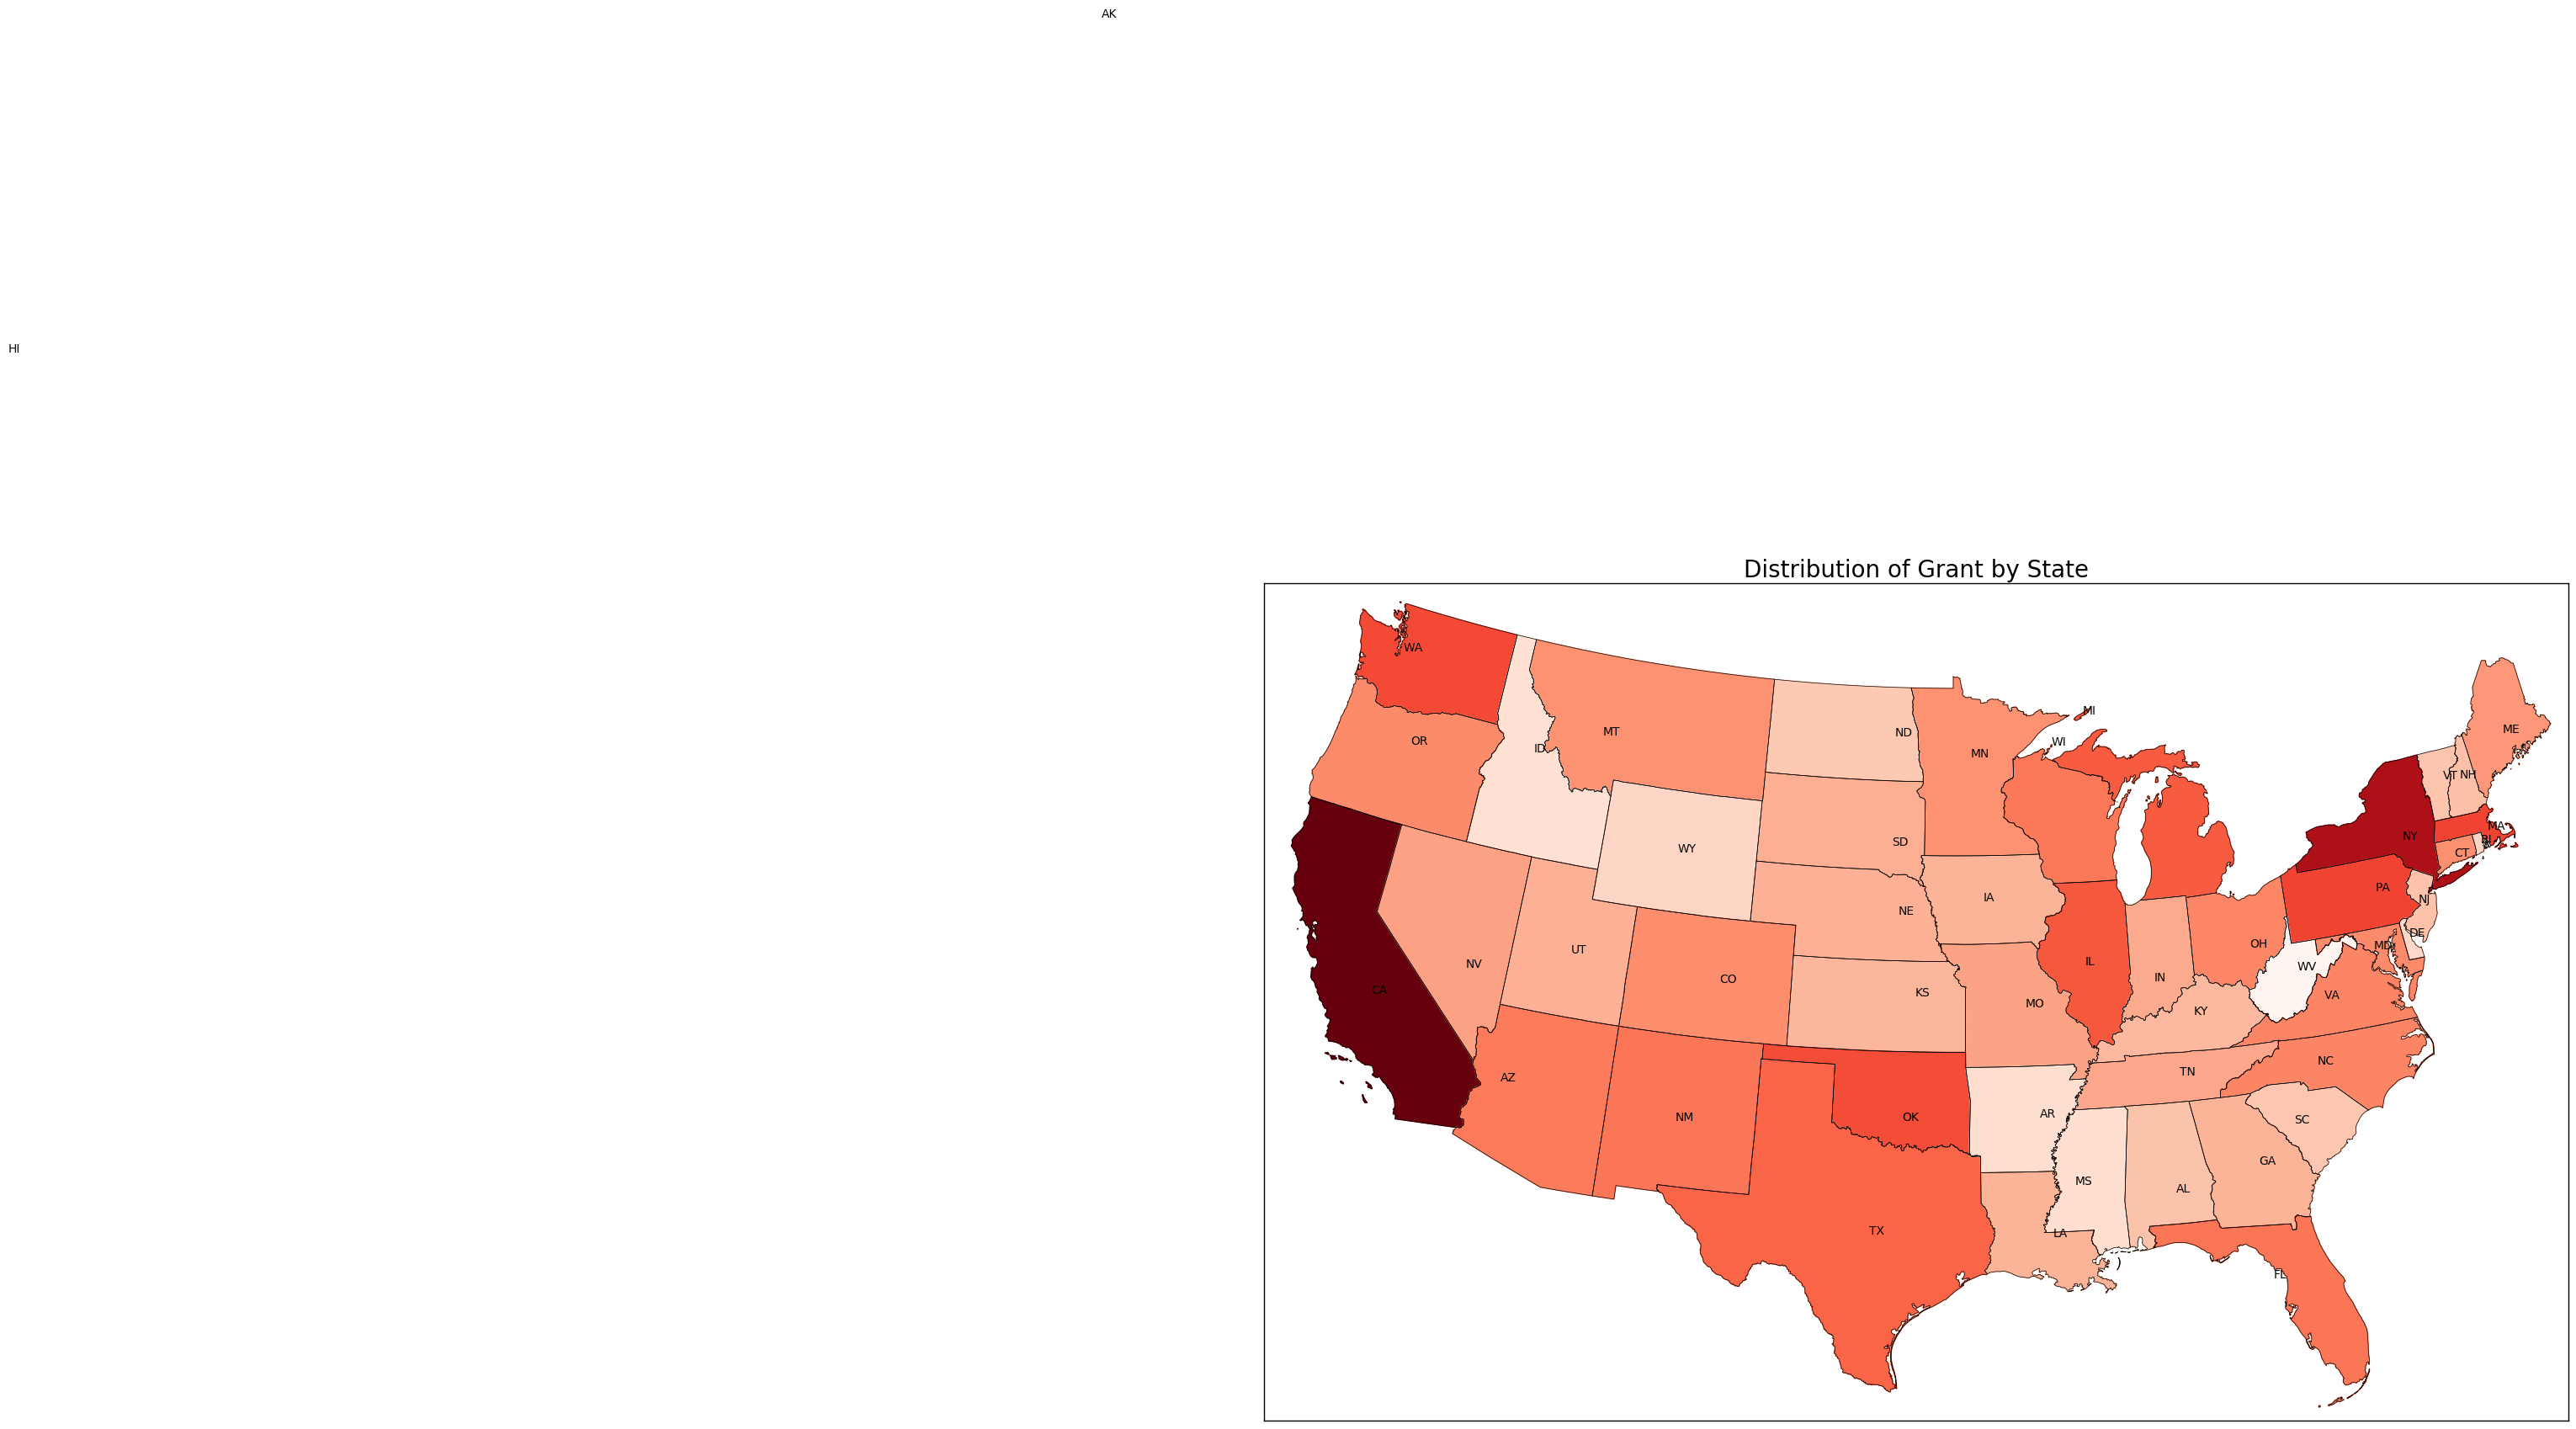

In [165]:

from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon


fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20, 20)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)


# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.Reds

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = countdict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))
    statenames.append(statename)
# cycle through state names, color each one.

for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
        
printed_names = []
for shapedict,state in zip(m.states_info, m.states):
    statename = shapedict['NAME']    
    if statename not in ['District of Columbia','Puerto Rico']:
        short_name = states_shortname[statename]
        if short_name in printed_names: continue
        # center of polygon
        x, y = np.array(state).mean(axis=0)
        # You have to align x,y manually to avoid overlapping for little states
        plt.text(x+.1, y, short_name)
    printed_names += [short_name] 

ax.set_title("Distribution of Grant by State",fontsize=20)



In [10]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon

In [12]:
lon=data["Longitude"].tolist()
lat=data["Latitude"].tolist()

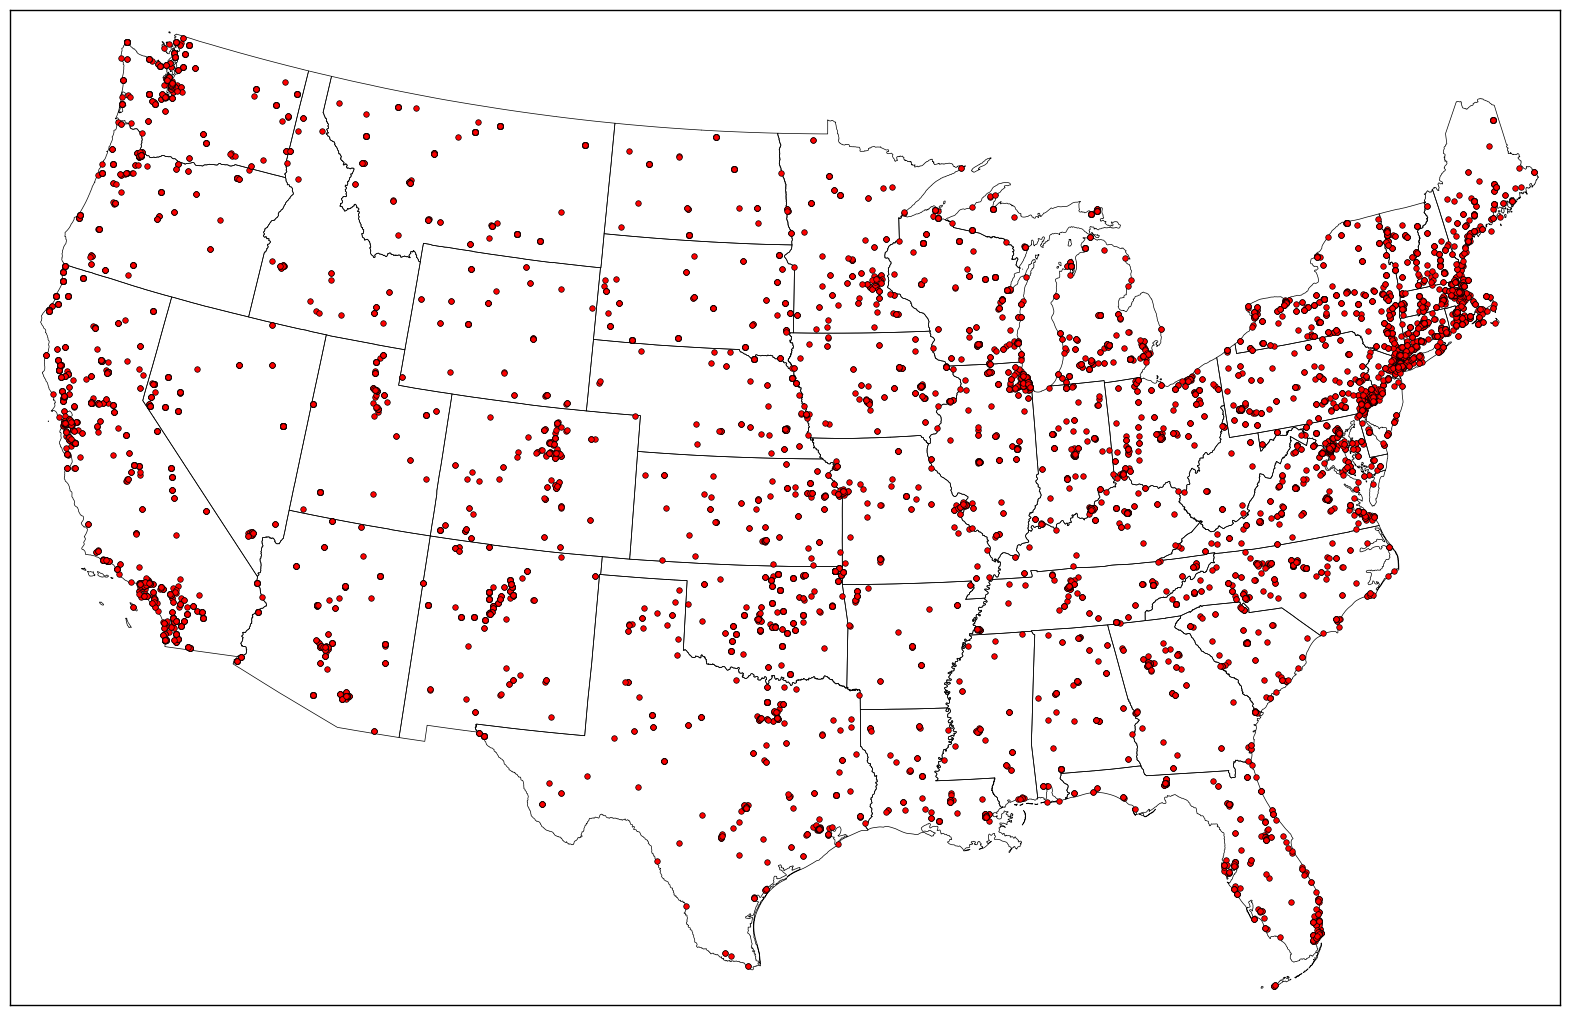

In [13]:
plt.rcParams["figure.figsize"] = (20, 20)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
shape_info=m.readshapefile('st99_d00', name='states', drawbounds=True)
# set a geo coordinate (for example, new york)

x,y = m(lon,lat)


# place it on the map
m.plot(x, y, 'ro', markersize=4)
plt.show()
